## XOR — N-Dimensional  (n = 12)

El **XOR N-dimensional** generaliza la compuerta XOR clásica a `n` bits: devuelve **1** si el número de unos es **impar** y **0** si es **par**.  
Este problema **no es linealmente separable** (ni con 2D ni con 12D), por lo que **requiere capas ocultas** para que la red aprenda combinaciones no lineales de las entradas. A medida que aumenta `n`, crece la complejidad de las interacciones y se vuelve un buen test para evaluar la capacidad de representación del modelo.

---

### Hiperparámetros utilizados

| Parámetro | Valor |
|----------|-------|
| Optimizador | Adam |
| Tasa de aprendizaje | 0.002 |
| Épocas | 150 |
| Función de activación | Sigmoide |
| Arquitectura | **6 capas** (incluye entrada y salida) |
| Neuronas por capa | `12 → 25 → 15 → 10 → 8 → 1` |

---

**Nota rápida para la presentación:**  
> “El XOR de 12 bits es una función de **paridad**: cuenta unos y decide si es **par o impar**. No hay un hiperplano que lo separe; por eso usamos varias capas ocultas para componer relaciones no lineales y capturar esa paridad.”

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D

In [25]:
from main.neural_network.neural_network import train, create_nn, predict
from main.neural_network.layers.activation.functions import Tanh, LeakyRelu, Sigmoid, Relu
from main.neural_network.utils.graphics.regression import learning_curve
from main.neural_network.optimizers.rmsprop import RMSProp
from main.neural_network.optimizers.sgd import SGD
from main.neural_network.optimizers.momentum import Momentum
from main.neural_network.optimizers.adagrad import Adagrad
from main.neural_network.optimizers.adam import Adam
from main.neural_network.losses.mse import MSELoss
from main.neural_network.utils.draw_nn import draw_nn
from main.neural_network.utils.graphics.regression import dispersion_graph
from main.neural_network.neural_network import test_loss

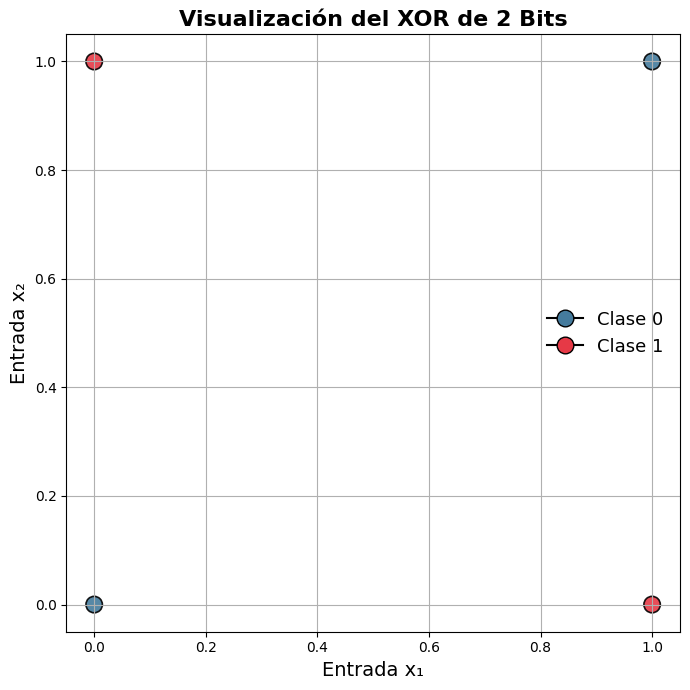

In [29]:
def generate_n_dimensional_xor(n):
    X = np.array(list(product([0, 1], repeat=n)))
    y = np.sum(X, axis=1) % 2
    
    X = X.reshape(2**n, n, 1)
    y = y.reshape(2**n, 1)
    
    return X, y

X, y = generate_n_dimensional_xor(2)

x_coords = X[:, 0, 0]
y_coords = X[:, 1, 0]
colors = np.where(y.ravel() == 1, "#E63946", "#457B9D")

plt.figure(figsize=(7, 7))

plt.scatter(
    x_coords, y_coords,
    c=colors,
    s=140,
    edgecolors='black',
    linewidths=1.2,
    alpha=0.9
)

plt.xlabel('Entrada x₁', fontsize=14)
plt.ylabel('Entrada x₂', fontsize=14)
plt.title('Visualización del XOR de 2 Bits', fontsize=16, fontweight='bold')

legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Clase 0', markerfacecolor='#457B9D', markersize=12),
    Line2D([0], [0], marker='o', color='black', label='Clase 1', markerfacecolor='#E63946', markersize=12)
]
plt.legend(handles=legend_elements, fontsize=13, frameon=False)

plt.grid(True)
plt.gca().set_facecolor("white")
plt.tight_layout()
plt.show()

In [5]:
X, y = generate_n_dimensional_xor(3)

x_coords = X[:, 0, 0]
y_coords = X[:, 1, 0]
z_coords = X[:, 2, 0]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c=['red' if label == 1 else 'blue' for label in y], s=100, edgecolors='k')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D XOR Dataset')
plt.show()

%matplotlib inline

<IPython.core.display.Javascript object>

In [6]:
X, y = generate_n_dimensional_xor(12)

X_train, X_test, y_train, y_test = train_test_split(X, y)

optimizers = [
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002)
]

activations = [Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([12, 25, 15, 10, 8, 1], activations, optimizers)

<IPython.core.display.Javascript object>

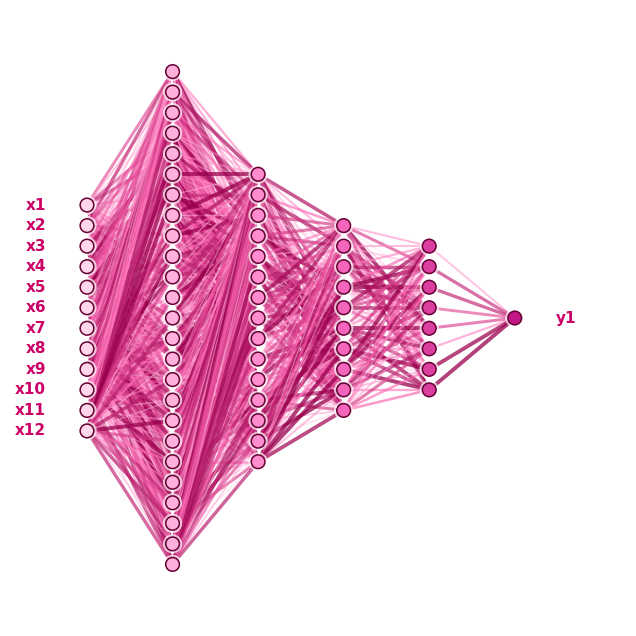

In [7]:
draw_nn(nn)

In [8]:
train_loss = train(nn, loss, X_train, y_train, epochs=200)

In [9]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.0024319848818597713


In [10]:
y_pred = []
for X, y in zip(X_test, y_test):
    output = predict(nn, X)
    y_pred.append(output)
    print(f'Pred: {output}, Actual: {y}')

Pred: [[0.00503206]], Actual: [0]
Pred: [[0.99999993]], Actual: [1]
Pred: [[0.99993435]], Actual: [1]
Pred: [[0.99999993]], Actual: [1]
Pred: [[0.9864877]], Actual: [1]
Pred: [[2.67651663e-07]], Actual: [0]
Pred: [[7.27005918e-06]], Actual: [0]
Pred: [[0.99999992]], Actual: [1]
Pred: [[2.17169858e-08]], Actual: [0]
Pred: [[0.00520061]], Actual: [0]
Pred: [[0.99997656]], Actual: [1]
Pred: [[0.00512377]], Actual: [0]
Pred: [[1.13702983e-05]], Actual: [0]
Pred: [[5.14839644e-08]], Actual: [0]
Pred: [[0.99999994]], Actual: [1]
Pred: [[9.18403494e-06]], Actual: [0]
Pred: [[1.06984867e-07]], Actual: [0]
Pred: [[0.00607389]], Actual: [0]
Pred: [[0.99999924]], Actual: [1]
Pred: [[1.84475797e-07]], Actual: [0]
Pred: [[0.99998127]], Actual: [1]
Pred: [[1.04678561e-05]], Actual: [0]
Pred: [[0.99999997]], Actual: [1]
Pred: [[0.00516404]], Actual: [0]
Pred: [[0.99995773]], Actual: [1]
Pred: [[0.00503841]], Actual: [0]
Pred: [[1.99121302e-07]], Actual: [0]
Pred: [[0.9999781]], Actual: [1]
Pred: [[0.

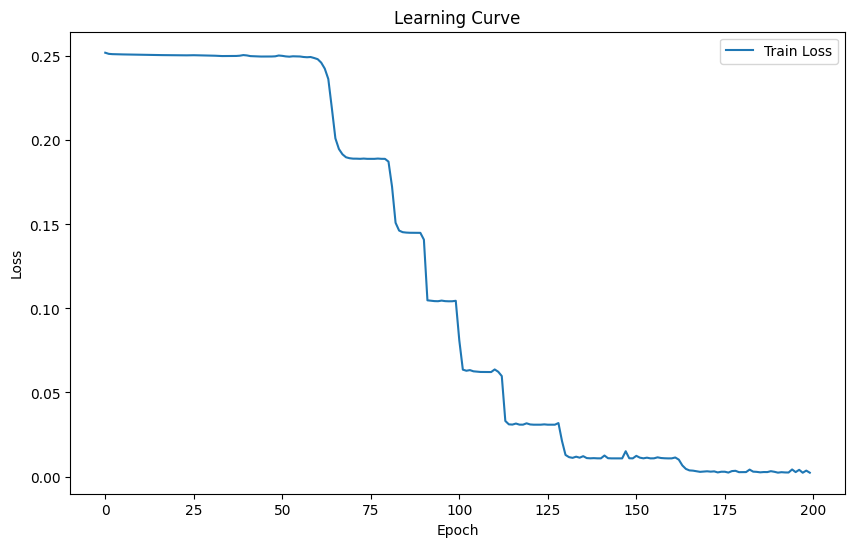

In [11]:
learning_curve(train_loss)

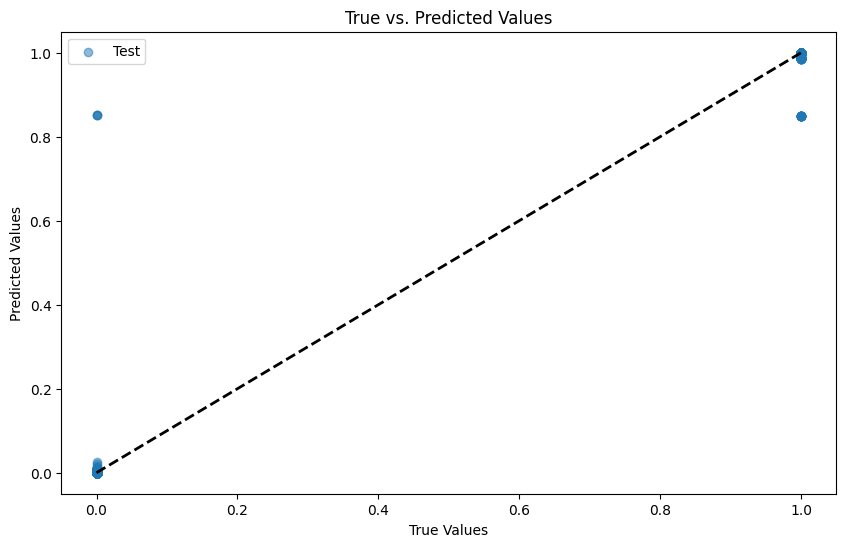

In [12]:

dispersion_graph(y_test, y_pred)

# Experimentos

### Primer test

In [13]:
optimizers = [
    Adagrad(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adagrad(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adagrad(learning_rate=0.002)
]

activations = [Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([12, 25, 15, 10, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [14]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.1270208127050893


### Segundo test

In [15]:
optimizers = [
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003)
]

activations = [Tanh(), Tanh(), Tanh(), Tanh(), Tanh()]

loss = MSELoss()

nn = create_nn([12, 50, 25, 15, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [16]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.44322516752691793


### Tercer test

In [17]:
optimizers = [
    RMSProp(learning_rate=0.001),
    Adam(learning_rate=0.001),
    RMSProp(learning_rate=0.001),
    Adam(learning_rate=0.001),
    RMSProp(learning_rate=0.001)
]

activations = [LeakyRelu(), LeakyRelu(), LeakyRelu(), LeakyRelu(), LeakyRelu()]

loss = MSELoss()

nn = create_nn([12, 30, 20, 10, 5, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [18]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.0002299598042206523


### Cuarto test

In [19]:
optimizers = [
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002)
]

activations = [Relu(), Relu(), Relu(), Relu(), Relu()]

loss = MSELoss()

nn = create_nn([12, 40, 30, 20, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [20]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.521484375
